#### Named Entity Recognition

In [1]:
!pip install spacy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [2]:
import pandas
book=pd.read_csv("C:/Users/navee/OneDrive/Desktop/Data Science Assignments/Assignment 11 - Text Mining/Twitter user tweets.txt",error_bad_lines=False)

b'Skipping line 36: expected 1 fields, saw 3\n'


In [3]:
book = [x.strip() for x in book.x] # remove both the leading and the trailing characters
book = [x for x in book if x] # removes empty strings, because they are considered in Python as False
book[0:10]

['Awkward embarrassed n yet delighted, honoured, privileged n over the moon to display my work amongst such great artist n legends like Raja Ravi Varma, Abanindranath Tagore, & VS Gaitonde. In all humility, thank u for the honour!',
 "Yahan toh ek selfie banti hai. The world's biggest music league is here! Chal MEGA SELFIE lele re.",
 'Har andaaz mein FRSHness!',
 'To all my fans.. thank u for your love support n concern. Khayal rakho apna n parivaar ka. God bless n loveee u tooo...',
 'Enjoy your stay at the celebrity home ‘Chhota Mahal’ Bara Bungalow, Amer with super hospitality. Feel at home whilst in #Jaipur',
 'Ye future ready hain, 5G ke sath fastest charging bhi or hai badiya display and awesome design.',
 'Desh ke har kono se music ke peshewar khiladi aayengey ek saath, duniya ki pehli music league mein likhengey ek naya itihaas. Dekhiye',
 'Happy Republic Day to all. Public ke saath mill jull ke raho , reunite , repay with love affection kindness  n rejoice . Jai Hind!',
 'Sta

In [4]:
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2021-03-07 00:32:18.935079: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-03-07 00:32:18.935111: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [5]:
##Part Of Speech Tagging
nlp = spacy.load("en_core_web_sm")

one_block = book[0]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [6]:
one_block

'Awkward embarrassed n yet delighted, honoured, privileged n over the moon to display my work amongst such great artist n legends like Raja Ravi Varma, Abanindranath Tagore, & VS Gaitonde. In all humility, thank u for the honour!'

In [7]:
for token in doc_block[0:20]:
    print(token, token.pos_)

Awkward PROPN
embarrassed VERB
n CCONJ
yet ADV
delighted ADJ
, PUNCT
honoured VERB
, PUNCT
privileged ADJ
n CCONJ
over ADP
the DET
moon NOUN
to PART
display VERB
my PRON
work NOUN
amongst ADP
such ADJ
great ADJ


In [8]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[5:25])

['artist', 'legends', 'humility', 'thank', 'u', 'honour']


In [9]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10]

,word,count
0,embarrassed,1
1,honoured,1
2,moon,1
3,display,1
4,work,1
5,artist,1
6,legends,1
7,humility,1
8,thank,1
9,honour,1


<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

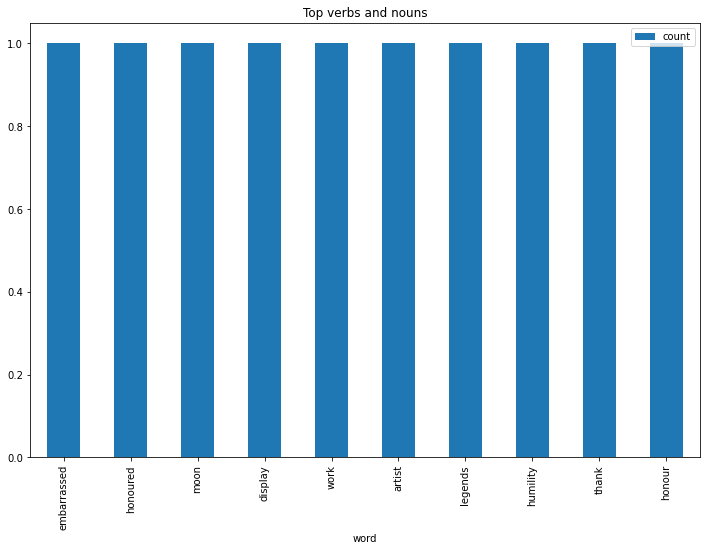

In [10]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

#### Emotion Mining

In [11]:
#Sentiment analysis
afinn = pd.read_csv('C:/Users/navee/OneDrive/Desktop/Data Science Docs/Python/Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [12]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

import pandas
book=pd.read_csv("C:/Users/navee/OneDrive/Desktop/Data Science Assignments/Assignment 11 - Text Mining/Twitter user tweets.txt",error_bad_lines=False)
book = [x.strip() for x in book.x] # remove both the leading and the trailing characters
book = [x for x in book if x] # removes empty strings, because they are considered in Python as False

b'Skipping line 36: expected 1 fields, saw 3\n'


In [14]:
import nltk
nltk.download('punkt')
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(book))
sentences[5:15]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\navee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['Har andaaz mein FRSHness!',
 'To all my fans.. thank u for your love support n concern.',
 'Khayal rakho apna n parivaar ka.',
 'God bless n loveee u tooo...',
 'Enjoy your stay at the celebrity home ‘Chhota Mahal’ Bara Bungalow, Amer with super hospitality.',
 'Feel at home whilst in #Jaipur Ye future ready hain, 5G ke sath fastest charging bhi or hai badiya display and awesome design.',
 'Desh ke har kono se music ke peshewar khiladi aayengey ek saath, duniya ki pehli music league mein likhengey ek naya itihaas.',
 'Dekhiye Happy Republic Day to all.',
 'Public ke saath mill jull ke raho , reunite , repay with love affection kindness  n rejoice .',
 'Jai Hind!']

In [15]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,"Awkward embarrassed n yet delighted, honoured,..."
1,"In all humility, thank u for the honour!"
2,Yahan toh ek selfie banti hai.
3,The world's biggest music league is here!
4,Chal MEGA SELFIE lele re.
5,Har andaaz mein FRSHness!
6,To all my fans.. thank u for your love support...
7,Khayal rakho apna n parivaar ka.
8,God bless n loveee u tooo...
9,Enjoy your stay at the celebrity home ‘Chhota ...


In [16]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [17]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [18]:
# test that it works
calculate_sentiment(text = 'amazing')

4

In [19]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [20]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0    30
1     8
2     6
3     7
4     5
5     4
6    12
7     6
8     6
9    15
Name: word_count, dtype: int64

In [21]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
10,Feel at home whilst in #Jaipur Ye future ready...,4,23
9,Enjoy your stay at the celebrity home ‘Chhota ...,5,15
35,Wishing all a v Happy Diwali n a prosperous ne...,5,18
52,"Congratulations Happy father's Day , the best ...",6,20
42,All the strength hope wishes from the bottom o...,9,36
37,"For exclusive offers on FRSH, click this link ...",10,32
13,"Public ke saath mill jull ke raho , reunite , ...",10,18
6,To all my fans.. thank u for your love support...,10,12
0,"Awkward embarrassed n yet delighted, honoured,...",10,30
43,Wishing the honourable prime minister Mr. Nare...,11,28


In [22]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    54.000000
mean      2.111111
std       3.289014
min       0.000000
25%       0.000000
50%       0.000000
75%       4.000000
max      11.000000
Name: sentiment_value, dtype: float64

In [23]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
2,Yahan toh ek selfie banti hai.,0,6
4,Chal MEGA SELFIE lele re.,0,5
5,Har andaaz mein FRSHness!,0,4
7,Khayal rakho apna n parivaar ka.,0,6
11,Desh ke har kono se music ke peshewar khiladi ...,0,22


In [24]:
sent_df[sent_df['sentiment_value']>=10].head()

,sentence,sentiment_value,word_count
0,"Awkward embarrassed n yet delighted, honoured,...",10,30
6,To all my fans.. thank u for your love support...,10,12
13,"Public ke saath mill jull ke raho , reunite , ...",10,18
37,"For exclusive offers on FRSH, click this link ...",10,32
43,Wishing the honourable prime minister Mr. Nare...,11,28


In [25]:
sent_df['index']=range(0,len(sent_df))

C:\Users\navee\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

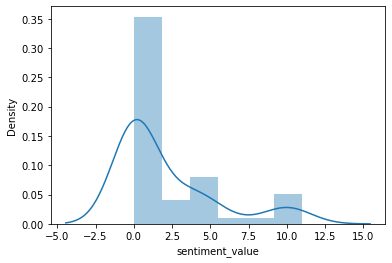

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

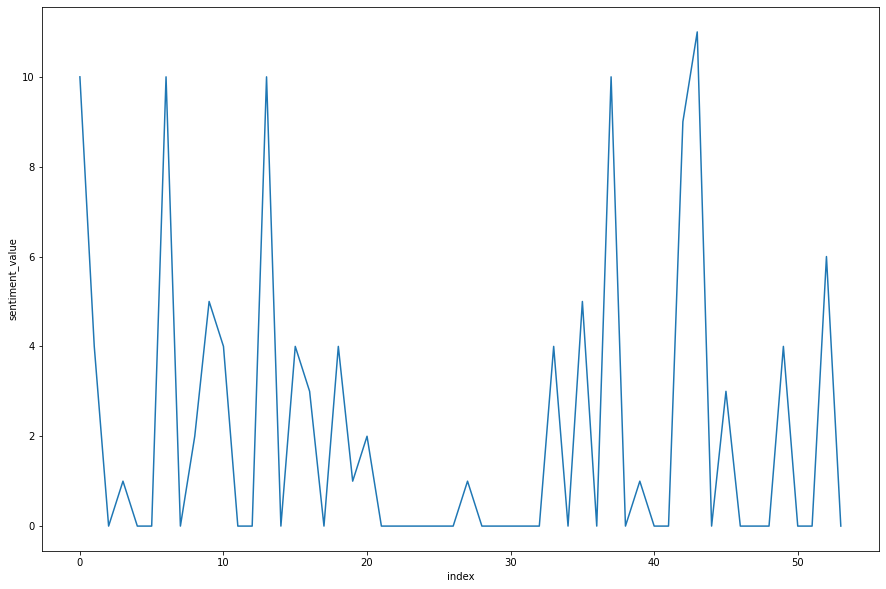

In [27]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

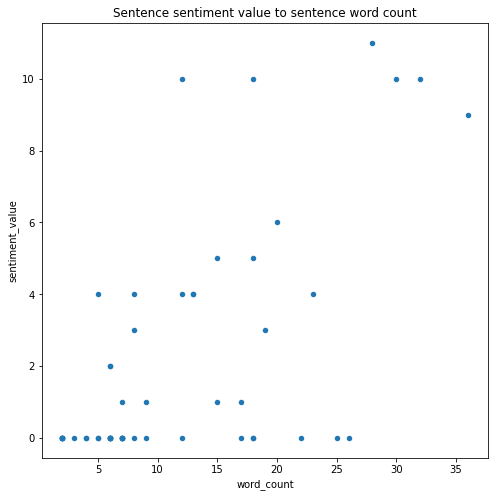

In [28]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')